# <font color='#c1111d'> Airline Ticket Price dataset - ATP1D

    
    
<hr>
    
Each instance defines a set of observations from a specific date and departure. The independent variables for each instance are values related to the airline ticket prices prediction. The target variables are the next day price
    
    
**Goal :**
    
regression between 411 features and 6 targets    
    
<hr> 
    
Everything required for this exercise is available at : 
    
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series3" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "https://drive.google.com/drive/folders/1l3P_yFAoYrip1KmuajKSa5a_eymcd-tJ?usp=sharing" > Q-ML-series3 google drive </a>
    

# <font color='#c1111d'>  Import libraries
    
<hr>
    
Just as the title says. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# <font color='#c1111d'>  Import data
<hr>
    

Using pandas to read the data. Data is availabe from the sourse website (Kaggle). You can download the data from this link :
<a href = "https://www.kaggle.com/datasets/samanemami/airline-ticket-price-dataset-atp1d">Airline Ticket Price dataset - ATP1D
</a>
    


In [2]:
path = "../Data/"
dataset = pd.read_csv(path + "atp1d.csv")

## <font color='#c1111d'>   data information
    
Information about column data types and the shape of the dataset.
    
There are 337 samples with 417 columns of dependant and independent variables.
    
You can check top 5 samples of the dataset

In [3]:
print(dataset.dtypes)
print("shape of the dataset is : ",dataset.shape)

departwb                int64
departdaytype           int64
fetchdays               int64
fetchdow                int64
dtd                     int64
                        ...  
LBL_ALLminp0_fut_001    int64
LBL_aDLminpA_fut_001    int64
LBL_aCOminpA_fut_001    int64
LBL_aFLminpA_fut_001    int64
LBL_aUAminpA_fut_001    int64
Length: 417, dtype: object
shape of the dataset is :  (337, 417)


In [4]:
dataset.head()

,departwb,departdaytype,fetchdays,fetchdow,dtd,ALLminpA,ALLminpAl1,ALLminpAl2,ALLminpAl7,ALLavgpA,...,fdisoweekday4,fdisoweekday5,fdisoweekday6,fdisoweekday7,LBL_ALLminpA_fut_001,LBL_ALLminp0_fut_001,LBL_aDLminpA_fut_001,LBL_aCOminpA_fut_001,LBL_aFLminpA_fut_001,LBL_aUAminpA_fut_001
0,72,1,69,5,3,549,584,640,456,875.34,...,0,1,0,0,788,1339,853,853,788,853
1,72,1,70,6,2,788,549,584,326,1023.44,...,0,0,1,0,788,1339,853,853,788,853
2,72,1,71,7,1,788,788,549,336,1005.97,...,0,0,0,1,788,1339,853,853,788,853
3,79,1,69,5,10,336,298,298,320,616.73,...,0,1,0,0,336,675,631,587,336,587
4,79,1,70,6,9,336,336,298,320,628.87,...,0,0,1,0,336,675,631,587,336,587


## <font color='#c1111d'>   Many useless columns and new dataframes

    
As you can see, We have more features than our samples which will effect our model; Therefore we need to drop some unrelated columns and only pick those that are relavant to our modeling.
    
We decided to keep all the columns for now so we can later decide if something is irrelevant or not.

In [5]:
# Remove irrelevant columns later, Keep the data original for the time being...

task = dataset

In [6]:
task.describe()

,departwb,departdaytype,fetchdays,fetchdow,dtd,ALLminpA,ALLminpAl1,ALLminpAl2,ALLminpAl7,ALLavgpA,...,fdisoweekday4,fdisoweekday5,fdisoweekday6,fdisoweekday7,LBL_ALLminpA_fut_001,LBL_ALLminp0_fut_001,LBL_aDLminpA_fut_001,LBL_aCOminpA_fut_001,LBL_aFLminpA_fut_001,LBL_aUAminpA_fut_001
count,337.000000,337.0,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,130.243323,1.0,100.854599,4.160237,29.388724,316.172107,310.094955,304.810089,291.821958,528.595935,...,0.124629,0.151335,0.160237,0.163205,322.065282,433.115727,458.887240,470.667656,344.445104,470.421365
std,35.552696,0.0,23.213802,2.029065,23.459443,89.151924,76.580586,63.909065,35.923833,141.389164,...,0.330789,0.358908,0.367372,0.370102,101.550400,250.689872,184.054839,165.814555,119.978957,173.672877
min,72.000000,1.0,69.000000,1.000000,1.000000,198.000000,198.000000,199.000000,171.000000,355.060000,...,0.000000,0.000000,0.000000,0.000000,198.000000,199.000000,198.000000,299.000000,232.000000,278.000000
25%,100.000000,1.0,80.000000,2.000000,11.000000,273.000000,277.000000,277.000000,278.000000,440.850000,...,0.000000,0.000000,0.000000,0.000000,273.000000,299.000000,329.000000,329.000000,277.000000,319.000000
50%,121.000000,1.0,94.000000,4.000000,24.000000,292.000000,292.000000,292.000000,292.000000,482.130000,...,0.000000,0.000000,0.000000,0.000000,292.000000,337.000000,406.000000,433.000000,303.000000,430.000000
75%,142.000000,1.0,122.000000,6.000000,41.000000,321.000000,318.000000,313.000000,309.000000,540.050000,...,0.000000,0.000000,0.000000,0.000000,319.000000,419.000000,496.000000,513.000000,346.000000,513.000000
max,233.000000,1.0,144.000000,7.000000,92.000000,788.000000,788.000000,640.000000,456.000000,1104.360000,...,1.000000,1.000000,1.000000,1.000000,788.000000,1349.000000,1151.000000,973.000000,794.000000,1088.000000


## <font color='#c1111d'>   train and test split
    
Split a portion of data so that it can be used as test to evaluate our model. 

In [7]:
task_x = (task.iloc[:, 0:411])
task_y = (task.iloc[:, 411:417])
task_x_train, task_x_test, task_y_train, task_y_test = train_test_split(task_x, task_y, test_size= 0.25)

# <font color='#c1111d'>   Model
 
<hr>
    
    
Data is ready to be used by our model, so before that we need to create multiple models so that each model will train on the training data and evaluated on the test data.
    
    
We choose a linear regression and polynomial regression for test tasks. degree of polynomial regressions are 1,2 . Overall  linear regression models  for this task.
    
    
Degrees more than 5 will recieve memory error and more than 2 might cause your system to crash considering the total number of features are more than 400.
    
    
As well as linear and polynomial regression we are going to use XGBoost to model our data and evaluate it as well.
    
- XGBoost
    
This is going to take a while to run  (probably) ....

In [8]:
# This might take some time . ....

task_models = {}


M = [1, 2]
polynomials = {}
for _degree in M:
    polynomials[_degree] = PolynomialFeatures(degree = _degree, include_bias = True)

    
# Linear Regression models 

for _degree in M:
        model = LinearRegression()
        
        x_train = task_x_train.values
        x_train = polynomials[_degree].fit_transform(x_train)
        y_train = task_y_train.values
        
        model.fit(x_train,y_train)
        
        task_models[_degree] = model
        
# XGBOOST


xgb= XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(task_x_train,task_y_train)
task_models['XGBoost'] = xgb

## <font color='#c1111d'>   Predict
    
Our goal is to use these models to predict the MaxTemp  using MinTemp.

In [9]:
task_predicted = {}

for _degree in M:
    
    task_predicted[_degree] = {
        'train' : task_models[_degree].predict(polynomials[_degree].fit_transform(task_x_train.values)), 
        'test' : task_models[_degree].predict(polynomials[_degree].fit_transform(task_x_test.values))
        }
    
task_predicted['XGBoost'] = {
        'train' : task_models['XGBoost'].predict(task_x_train.values),
        'test' : task_models['XGBoost'].predict(task_x_test.values)   
}

## <font color='#c1111d'>   RMSE
    
We are going to use RMSE to evaluate our models; Therefore we need to define it :
    
Edit :  It is also possible to use it from sklearn
    
RMSE is a bit different in this case , It is the sum of $||.||_2^2$ of errors.
    
    
$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat y_i - y_i)^2}{n}}$  

In [10]:
def RMSE(Y,Yhat):
    N = len(Y)
    rmse = np.sqrt(np.sum((Y-Yhat)**2)/N)
    return rmse

## <font color='#c1111d'> Evaluation
    
    
Evaluate our models using RMSE

In [11]:
task_rmse = {}

for _degree in M: 
    task_rmse[_degree]  = {
        'train' : RMSE(task_y_train.values,task_predicted[_degree]['train']),
        'test' : RMSE(task_y_test.values,task_predicted[_degree]['test'])
    }
    
task_rmse['XGBoost'] = {
        'train' : RMSE(task_y_train.values,task_predicted['XGBoost']['train']),
        'test' : RMSE(task_y_test.values,task_predicted['XGBoost']['test'])
}
 

# <font color='#c1111d'>   Result
 
<hr>
    
You can check the result for each model and choose the best model to predict this multi-target dataset.

    
We will also Visualize our predicted vs actual data on both train and test for our task.

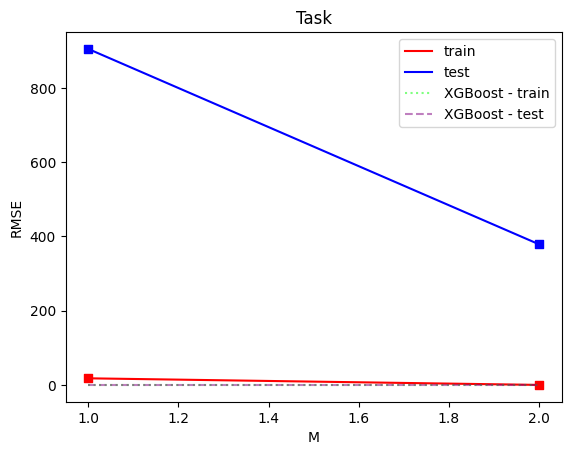

In [12]:
plt.plot(M, [task_rmse[i]['train'] for i in M], color = 'red', label = 'train')
plt.scatter(M, [task_rmse[i]['train'] for i in M], color = 'red', marker= 's')
plt.plot(M, [task_rmse[i]['test'] for i in M], color = 'blue', label = 'test')
plt.scatter(M, [task_rmse[i]['test'] for i in M], color = 'blue', marker= 's')
plt.plot(M, [task_rmse['XGBoost']['train'] for i in M],color = 'lime' 
         , linestyle = 'dotted',label = 'XGBoost - train',alpha = 0.5)
plt.plot(M, [task_rmse['XGBoost']['train'] for i in M],color = 'purple' 
         , linestyle = 'dashed',label = 'XGBoost - test',alpha = 0.5)
plt.xlabel('M')
plt.ylabel('RMSE')
plt.title('Task')
plt.legend(loc = 'best')
plt.show()

## <font color='#c1111d'>   Linear Models
 
Y and Yhat plot in XY-plane in response to their sample number.

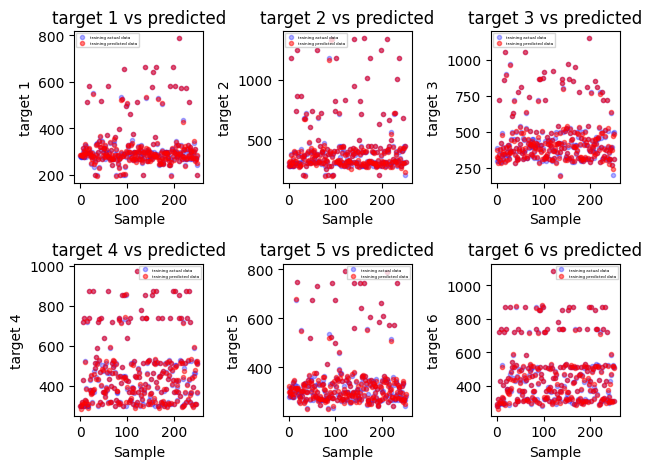

In [13]:
fig, ax = plt.subplots(2,3)


for j in range(0,3):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[1]['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f'target {j+1}')
    ax[0][j].set_title(f'target {j+1} vs predicted')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,3):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+3] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[1]['train'][i][j+3] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f'target {j+4}')
    ax[1][j].set_title(f'target {j+4} vs predicted')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()

## <font color='#c1111d'>   Polynomiad degree 2  Model
 
Y and Yhat plot in XY-plane in response to their sample number.

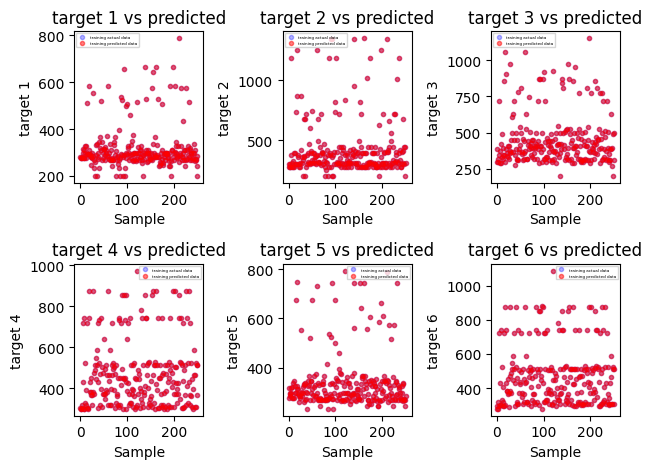

In [14]:
fig, ax = plt.subplots(2,3)


for j in range(0,3):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[2]['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f'target {j+1}')
    ax[0][j].set_title(f'target {j+1} vs predicted')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,3):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+3] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted[2]['train'][i][j+3] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f'target {j+4}')
    ax[1][j].set_title(f'target {j+4} vs predicted')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()

## <font color='#c1111d'>   XGBoost
 
Y and Yhat plot in XY-plane in response to their sample number.

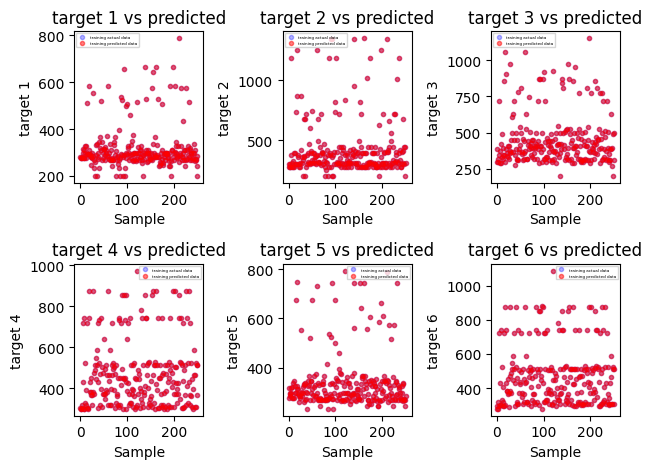

In [15]:
fig, ax = plt.subplots(2,3)


for j in range(0,3):
    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[0][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted['XGBoost']['train'][i][j] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[0][j].set_xlabel('Sample')
    ax[0][j].set_ylabel(f'target {j+1}')
    ax[0][j].set_title(f'target {j+1} vs predicted')
    ax[0][j].legend(loc = 'best', prop = {'size' : 3})
    
for j in range(0,3):
    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_y_train.values[i][j+3] for i in range(0,len(task_x_train))]
                , color = 'blue', marker = '.', alpha = 0.3 , label = 'training actual data'
             )

    ax[1][j].scatter( [i for i in range(0,len(task_x_train))] 
              , [task_predicted['XGBoost']['train'][i][j+3] for i in range(0,len(task_x_train))]
                , color = 'red', marker = '.', alpha = 0.5 , label = 'training predicted data'
             )

    ax[1][j].set_xlabel('Sample')
    ax[1][j].set_ylabel(f'target {j+4}')
    ax[1][j].set_title(f'target {j+4} vs predicted')
    ax[1][j].legend(loc = 'best', prop = {'size' : 3})   
    

fig.tight_layout()
plt.show()